# Ham or Spam

## Bu projede Spam Turkcele gönderilen mesajların spam olup olmadığını bilen bir Classification modelli geliştireceğiz

In [1]:
import warnings

import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('spam.csv',encoding='iso-8859-1') #Türkçe karakterleri tanıttık 

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
import neattext as nt

In [5]:
df.shape

(5572, 5)

In [49]:
del df['Unnamed: 4'] #Boş sütunları siilmek için 
 #df.drop(['Unnamed: 4','Unnamed: 3','Unnamed: 2'],axis=1,inplace=True)   #buda ikinci yöntemi


In [50]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
df.columns=['class','text'] #sütun isimlerini değiştirdik

In [52]:
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
#En çok tekrar eden kelimeleri bulalım ilk önce txtleri birleştiriyoruz

In [54]:
hepsi=''.join(df['text'])

In [55]:
hepsi

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sU dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcvEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneWINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R enti

In [56]:
sent=nt.TextFrame(hepsi)

In [57]:
sent.describe()

Key      Value          
Length  : 446422         
vowels  : 123893         
consonants: 203282         
stopwords: 33669          
punctuations: 22903          
special_char: 23446          
tokens(whitespace): 80954          
tokens(words): 87947          


In [58]:
df.shape

(5572, 2)

In [59]:
sent.length

446422

In [60]:
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
sent.head() #ilk beş harfi veriyo

'Go un'

In [62]:
sent.tail(30) #son 30 karakteri veriyo

'freeRofl. Its true to its name'

In [63]:
sent.count_vowels() #hangi harf kaç kere kullanılmış onu gösteriyo tabiki sesli harfler 

{'a': 25248, 'e': 34934, 'i': 22439, 'o': 28962, 'u': 12310}

In [64]:
sent.count_stopwords() # gereksiz kelimeler

{'go': 258,
 'until': 26,
 'only': 161,
 'in': 837,
 'there': 119,
 'a': 1401,
 'to': 2220,
 'may': 39,
 'say': 74,
 'so': 376,
 'already': 43,
 'then': 172,
 'i': 1814,
 "don't": 125,
 'he': 159,
 'around': 46,
 'here': 64,
 "it's": 82,
 'been': 126,
 'now': 214,
 'and': 944,
 'no': 172,
 'some': 115,
 'you': 1763,
 'up': 242,
 'for': 680,
 'it': 437,
 'my': 712,
 'is': 836,
 'not': 374,
 'with': 373,
 'they': 111,
 'me': 573,
 'per': 56,
 'your': 649,
 'has': 115,
 'as': 153,
 'all': 246,
 'have': 545,
 'call': 530,
 'or': 405,
 'the': 1282,
 'on': 511,
 'be': 373,
 'about': 153,
 'this': 285,
 'enough': 21,
 'from': 271,
 'won': 64,
 'our': 135,
 'take': 118,
 'will': 362,
 'at': 379,
 'next': 58,
 'how': 192,
 'his': 55,
 'make': 99,
 'if': 342,
 'its': 175,
 'that': 439,
 'first': 47,
 'when': 261,
 'down': 45,
 'can': 350,
 'myself': 8,
 'really': 77,
 'always': 53,
 'are': 446,
 'an': 111,
 'did': 93,
 'over': 50,
 'do': 315,
 'back': 115,
 'what': 193,
 'does': 25,
 'still': 14

In [65]:
sent.count_consonants() #hangi sessiz harften ne kadar kullanılmış

{'b': 5310,
 'c': 8876,
 'd': 11275,
 'f': 5745,
 'g': 8284,
 'h': 14204,
 'j': 935,
 'k': 4533,
 'l': 15757,
 'm': 10573,
 'n': 21738,
 'p': 6811,
 'q': 236,
 'r': 17738,
 's': 18898,
 't': 27921,
 'v': 3504,
 'w': 8462,
 'x': 1586,
 'y': 10396,
 'z': 500}

In [66]:
sent.readability() #hangi kategoride olduğu

{'automated readability': 8.087364326125986,
 'description': '13-14 years (Eighth Grade)'}

In [67]:
import nltk #natural language tookit

In [68]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /home/sifa/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [69]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [70]:
seyhbir=nltk.corpus.gutenberg.raw('shakespeare-macbeth.txt')

In [71]:
seyhbir

"[The Tragedie of Macbeth by William Shakespeare 1603]\n\n\nActus Primus. Scoena Prima.\n\nThunder and Lightning. Enter three Witches.\n\n  1. When shall we three meet againe?\nIn Thunder, Lightning, or in Raine?\n  2. When the Hurley-burley's done,\nWhen the Battaile's lost, and wonne\n\n   3. That will be ere the set of Sunne\n\n   1. Where the place?\n  2. Vpon the Heath\n\n   3. There to meet with Macbeth\n\n   1. I come, Gray-Malkin\n\n   All. Padock calls anon: faire is foule, and foule is faire,\nHouer through the fogge and filthie ayre.\n\nExeunt.\n\n\nScena Secunda.\n\nAlarum within. Enter King Malcome, Donalbaine, Lenox, with\nattendants,\nmeeting a bleeding Captaine.\n\n  King. What bloody man is that? he can report,\nAs seemeth by his plight, of the Reuolt\nThe newest state\n\n   Mal. This is the Serieant,\nWho like a good and hardie Souldier fought\n'Gainst my Captiuitie: Haile braue friend;\nSay to the King, the knowledge of the Broyle,\nAs thou didst leaue it\n\n   Cap. 

In [72]:
seyh=nt.TextFrame(seyhbir)

In [73]:
seyh.describe()

Key      Value          
Length  : 100351         
vowels  : 29039          
consonants: 46278          
stopwords: 7895           
punctuations: 4789           
special_char: 4789           
tokens(whitespace): 17741          
tokens(words): 18353          


In [74]:
seyh.readability()

{'automated readability': 13.40177050724963,
 'description': '18-24 years (College student)'}

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df.sample()

,class,text
5361,ham,Yep get with the program. You're slacking.


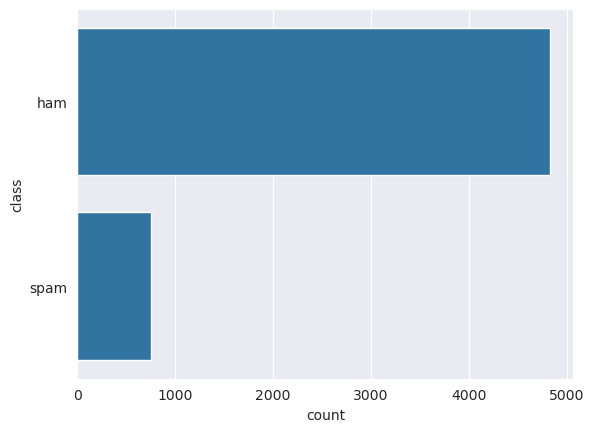

In [87]:
#data düzgünmü dağılmış
sns.countplot(df['class']);

In [88]:
#inbalance Dataset

In [89]:
df['class'].value_counts()

class
ham     4825
spam     747
Name: count, dtype: int64

In [90]:
from imblearn.over_sampling import SMOTE
# x=SMOTE().fit_resamle(x,y)

In [91]:
df['text']=df['text'].str.lower()

In [92]:

df['text']=df['text'].str.replace('[^\w\s]','',regex=True)
df['text']=df['text'].str.replace('\d+','',regex=True)
df['text']=df['text'].str.replace('\n','',regex=True)
df['text']=df['text'].str.replace('\r','',regex=True)

In [93]:
x=df['text']
y=df['class']

In [94]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
#pipeline yapılacak işlemleri sıraya koyuyorsunuz sonra bir fonksiyona koyuyoruz bunları bunları sıraya koyma işine pipeline deniyor

In [97]:
from sklearn.pipeline import Pipeline

In [98]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier())])

In [99]:
from sklearn.model_selection import train_test_split;

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [101]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [102]:
y_pred=clf.predict(x_test)

In [103]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix  #Başarı oranına bakıyoruz

In [104]:
accuracy=accuracy_score(y_test,y_pred)

In [105]:
accuracy

0.9721973094170404

In [106]:
confusion_matrix(y_test,y_pred)

array([[965,   0],
       [ 31, 119]])

In [107]:
from sklearn.svm import SVC #verimize extra boyut ekliyor 

In [108]:
svm=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC())])

In [109]:
svm.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [110]:
y_pred=svm.predict(x_test)

In [111]:
accuracy_score=accuracy_score(y_test,y_pred)

In [112]:
accuracy

0.9721973094170404

In [113]:
confusion_matrix(y_test,y_pred)

array([[965,   0],
       [ 23, 127]])

<Axes: >

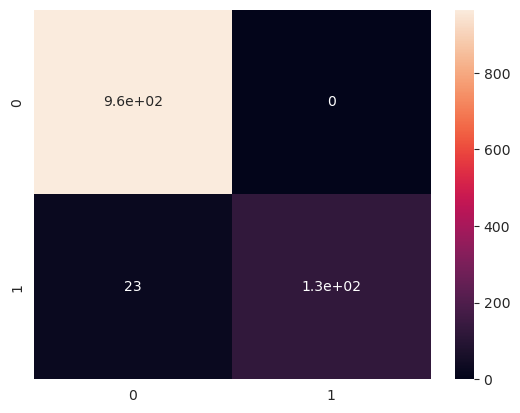

In [114]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [116]:
test1=['Hello, you are learning Natural Language Processing']
test2=['Congratulations, you won a lottary ticket. To claim call 1-800-899-9999']
test3=['Click here to claim your $1 million  lottary']

In [117]:
print(clf.predict(test1))

['ham']


In [118]:
print(clf.predict(test2))

['spam']


In [119]:
print(clf.predict(test3))

['ham']


In [120]:
print(svm.predict(test1))

['ham']


In [121]:
print(svm.predict(test2))

['spam']


In [122]:
print(svm.predict(test3))

['spam']


In [123]:
df['text'][250]

'ranjith cal drpd deeraj and deepak min hold'

In [124]:
svm.predict([df['text'][250]])

array(['ham'], dtype=object)

In [125]:
svm.predict([df['text'][2]])

array(['spam'], dtype=object)

In [126]:
ham=df[df['class']=='ham']
spam=df[df['class']=='spam']

In [127]:
# Data augmentation  -Yapılan işlem var olan datadan yeni datalar oluşturma 
# Synthetic Data  - 

In [129]:
#pip install wordcloud

In [130]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [131]:
ham.head()

,class,text
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,ok lar joking wif u oni
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives around here though
6,ham,even my brother is not like to speak with me they treat me like aids patent


In [132]:
def wc(data,color):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=color,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

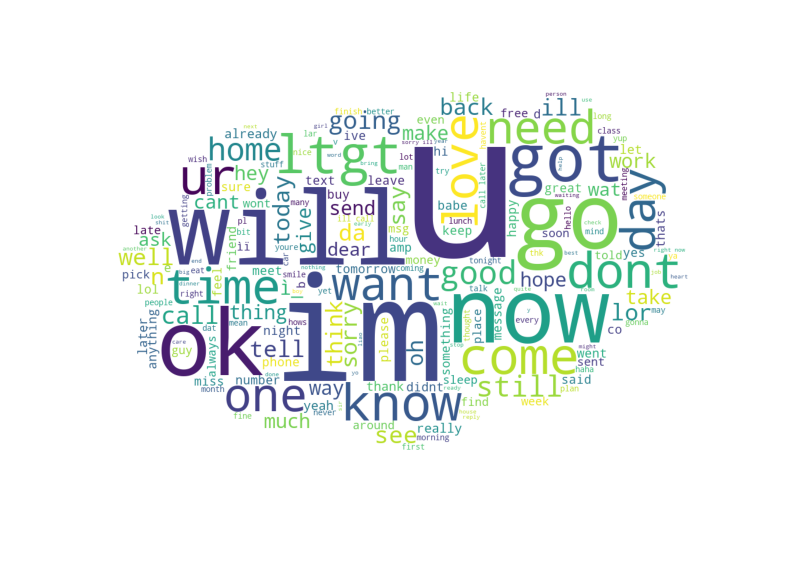

In [133]:
wc(ham['text'],'white')

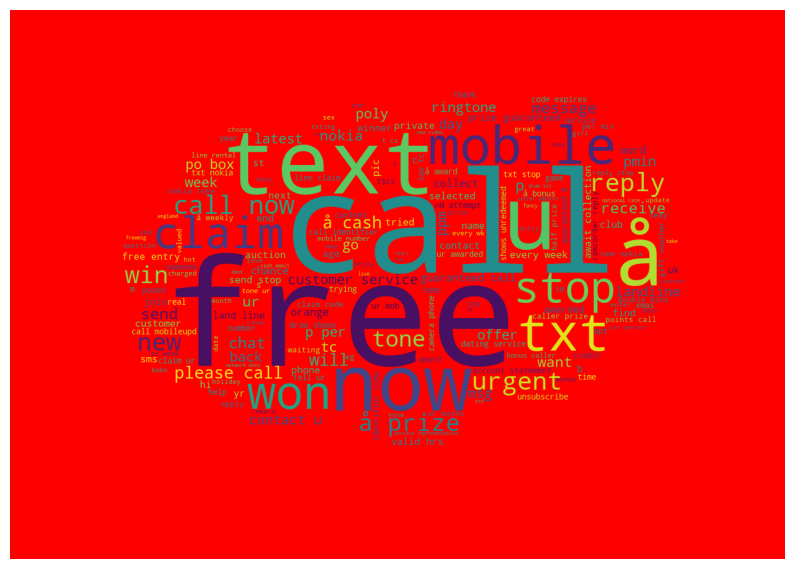

In [134]:
wc(spam['text'],'red')

In [135]:
spam=spam.sample(747)

In [136]:
ham.shape,spam.shape

((4825, 2), (747, 2))

In [137]:
data=pd.concat([ham,spam],ignore_index=True)

In [138]:
data.shape

(5572, 2)

In [139]:
data.shape 

(5572, 2)

In [140]:
data.head()

,class,text
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,ok lar joking wif u oni
2,ham,u dun say so early hor u c already then say
3,ham,nah i dont think he goes to usf he lives around here though
4,ham,even my brother is not like to speak with me they treat me like aids patent


<Axes: xlabel='count', ylabel='class'>

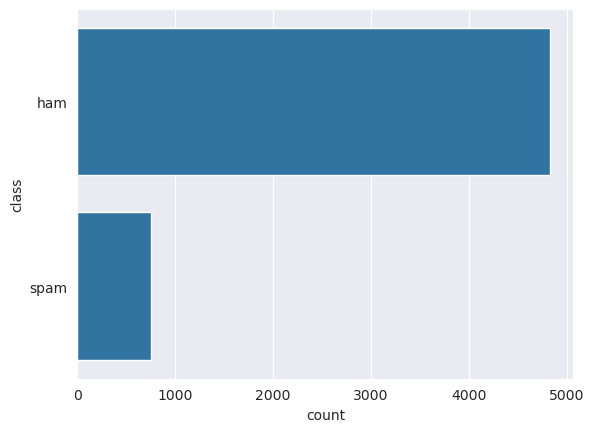

In [141]:
sns.countplot(data['class'])

In [143]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [144]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
from nltk.stem import PorterStemmer
pr = PorterStemmer()

In [145]:
from textblob import TextBlob
def lemmafn(text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words]

In [146]:
vect = CountVectorizer(ngram_range=(1, 2), analyzer=lemmafn)

x = vect.fit_transform(x)

In [147]:
y_pred=clf.predict(x_test)

In [148]:
accuracy_score(y_test,y_pred)

0.9721973094170404

In [149]:
# Sentiment Analysis -Bir metnin negatif mi pozitifmi olduğunu 

In [150]:
from textblob import TextBlob

In [151]:
text='I hate you!'

In [152]:
blob=TextBlob(text)

In [153]:
blob.sentiment

Sentiment(polarity=-1.0, subjectivity=0.9)

In [154]:
blob.sentiment.polarity

-1.0

In [155]:
blob.sentiment.subjectivity

0.9

In [157]:
#pip install spacy

In [159]:
#!python -m spacy download en_core_web_md

In [161]:
#pip install -U spacy

In [163]:
#pip install -U pydantic

In [164]:
import spacy

+ Tokenization 
+ Named Entity Recognition
+ Topic Moddelling
+ Pos taggin

In [165]:
nlp=spacy.load('en_core_web_md')

In [166]:
s1='''If the time has come to set sail,
A ship departs this port for the unknown.

It departs in silence, as if it had no passengers;
Neither a handkerchief nor an arm is waved in its departure.'''

In [167]:
print(s1.split())

['If', 'the', 'time', 'has', 'come', 'to', 'set', 'sail,', 'A', 'ship', 'departs', 'this', 'port', 'for', 'the', 'unknown.', 'It', 'departs', 'in', 'silence,', 'as', 'if', 'it', 'had', 'no', 'passengers;', 'Neither', 'a', 'handkerchief', 'nor', 'an', 'arm', 'is', 'waved', 'in', 'its', 'departure.']


In [168]:
doc1=nlp(s1);

In [169]:
s1=[x for x in doc1]

In [170]:
[x.lemma_ for x in s1]

['if',
 'the',
 'time',
 'have',
 'come',
 'to',
 'set',
 'sail',
 ',',
 '\n',
 'a',
 'ship',
 'depart',
 'this',
 'port',
 'for',
 'the',
 'unknown',
 '.',
 '\n\n',
 'it',
 'depart',
 'in',
 'silence',
 ',',
 'as',
 'if',
 'it',
 'have',
 'no',
 'passenger',
 ';',
 '\n',
 'neither',
 'a',
 'handkerchief',
 'nor',
 'an',
 'arm',
 'be',
 'wave',
 'in',
 'its',
 'departure',
 '.']

In [171]:
doc=nlp("Apple is looking at buying U.K. startup for $1 billion")

In [172]:
for token in doc :
    print(token.text, token.lemma_,token.pos_,token.tag_)

Apple Apple PROPN NNP
is be AUX VBZ
looking look VERB VBG
at at ADP IN
buying buy VERB VBG
U.K. U.K. PROPN NNP
startup startup NOUN NN
for for ADP IN
$ $ SYM $
1 1 NUM CD
billion billion NUM CD


In [173]:
from spacy import displacy

In [174]:
options = {"compact": True, "bg": "#09a3d5", "font": "Source Sans Pro", "color": "white", "distance": 100}
displacy.render(doc, style="dep", jupyter=False, options=options)

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="1389409680934bc8aeb17c448497d482-0" class="displacy" width="1150" height="287.0" direction="ltr" style="max-width: none; height: 287.0px; color: white; background: #09a3d5; font-family: Source Sans Pro; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="197.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">Apple</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">PROPN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="197.0">\n    <tspan class="displacy-word" fill="currentColor" x="150">is</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="150">AUX</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="197.0">\n    <tspan class="displacy-word" fill="currentColor" x="250">looking</tspan>\n    <tspan class="

In [176]:
#Named Entity Recognition NER

In [177]:
text="""Zafer Acar loves NLP and artificial intelligence, Python is a great programming language.
The Turkish Space Agency is the national space agency of Turkey, headquartered in Ankara.
It operates under the Department of Space which is tirectly overseen
by the President of Turkey and administrator of TUA is Serdar Hüseyin Yıldırım."""

In [178]:
doc=nlp(text)

In [179]:
displacy.render(doc,style='ent',options={'color':'blue'})